In [1]:
#Loading the dataset
from sklearn import datasets
import pandas as pd
digits = datasets.load_digits()
digX = digits['data']
digy = digits['target']

In [2]:
print(digits.data.shape)

(1797, 64)


<Figure size 640x480 with 0 Axes>

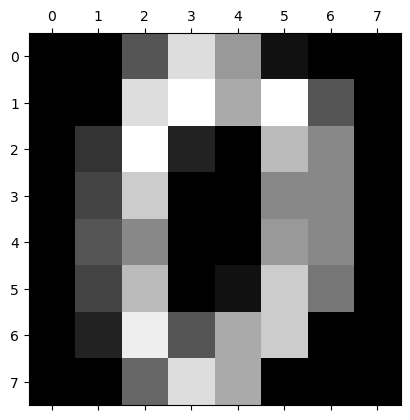

In [3]:
#Visualising the Data
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

In [40]:
#Building a Binary Classifier 
X_train, X_test, y_train, y_test = digX[:1400], digX[1400:], digy[:1400], digy[1400:] 
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train_9)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 10)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9)
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test_9)

In [42]:
#Evaluating Classifier 
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train_9, y_train_pred)

In [43]:
print("Training Matrix", cm_train)
#True Positive is 31
#True Negative 358
#False Positive 0
#False Negative 8
cm_test = confusion_matrix(y_test_9, y_test_pred)
print("Test Matrix", cm_test)

Training Matrix [[1239   22]
 [  20  119]]
Test Matrix [[343  13]
 [  6  35]]


In [44]:
#Calculating precision and recall of the training matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [45]:
#Precision Score
precision_score(y_train_9, y_train_pred)

0.8439716312056738

In [46]:
#Recall Score
recall_score(y_train_9, y_train_pred)

0.8561151079136691

In [47]:
#F1 Score
f1_score(y_train_9, y_train_pred)

0.85

In [48]:
#Extending classifier to a One Versus Rest
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(LogisticRegression())
ovr_clf.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

OneVsRestClassifier(estimator=LogisticRegression())

In [49]:
y_test_ovrpred = ovr_clf.predict(X_test)

In [50]:
confusion_matrix(y_test, y_test_ovrpred)

array([[37,  0,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0, 30,  0,  2,  0,  0,  0,  0,  3,  4],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 28,  0,  2,  0,  2,  6,  0],
       [ 0,  1,  0,  0, 38,  0,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 34,  3,  1],
       [ 0,  3,  0,  0,  1,  0,  0,  0, 35,  0],
       [ 1,  2,  0,  2,  0,  0,  0,  1,  0, 35]])

In [58]:
#Linear regression and Stochastic Gradient Descent 
from sklearn import datasets 
diabetes = datasets.load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [77]:
diaX = digits['data']
diay = digits['target']
model = LinearRegression()

In [78]:
model.fit(diaX, diay)

LinearRegression()

In [79]:
print(model.predict(diaX))

[2.52250135 1.03403331 2.34777807 ... 7.22573606 5.93914539 8.8313485 ]


In [80]:
print(model.coef_)

[-5.75781288e-16  8.57923376e-02 -1.00949621e-02 -2.83075186e-02
  5.82128113e-02 -4.65962898e-03 -3.46872516e-02 -5.54517203e-03
  1.17575413e+00 -2.72886589e-02  1.03489006e-01  4.39751669e-02
 -6.55655744e-02 -7.42239599e-02  8.77174597e-02  2.37097336e-01
 -9.21515850e-01  2.09262966e-02  7.90783605e-02 -3.13505587e-02
 -6.74572273e-02  4.84382828e-02 -5.51371084e-02 -2.58541429e-01
 -8.99034170e-01 -1.57869617e-01  3.73065417e-02  8.46264203e-02
  7.20498433e-02  9.39294415e-02 -1.92571119e-02 -2.80099726e+00
 -1.20597976e-14 -1.57318573e-01 -2.05647288e-02  1.35531204e-01
 -4.56698698e-02  3.50931490e-02 -1.03113414e-02 -3.88578059e-15
  1.33616091e-01  1.10960304e-01 -1.73050733e-02 -6.61512753e-03
  1.12607142e-01  5.58271849e-02  9.23827312e-03  9.82819205e-02
  6.02436261e-01  2.73519707e-02 -5.74530483e-03 -6.65091904e-02
 -2.06505662e-01 -4.09517963e-02  1.04008450e-01 -1.47742618e-01
 -1.24573828e+00 -1.38545269e-01  8.29622004e-03 -6.17605438e-02
 -6.54155098e-03 -7.92150

In [81]:
print(model.intercept_)

3.4059615104503007


In [82]:
print(model.score(diaX,diay))

0.5983606046616206


In [84]:
from sklearn.metrics import mean_squared_error
import numpy as np
pred_diab = model.predict(diaX)

model_mse = mean_squared_error(diay, pred_diab)
model_rmse = np.sqrt(model_mse)
model_rmse

1.8153816979827293

In [85]:
#Stochastic Gradient Descent 
sgd_reg = SGDRegressor()

In [86]:
sgd_reg.fit(diaX, diay)

SGDRegressor()

In [87]:
print(sgd_reg.coef_)

[ 0.00000000e+00 -1.22125934e+07  8.48586448e+05 -4.81573777e+07
  1.35174457e+08  9.94188589e+07 -2.64672521e+07  1.58983222e+08
  1.65796587e+08  3.75293201e+07  1.67196827e+07  3.37500820e+07
 -3.33471133e+06 -1.18418529e+07 -5.96089732e+07 -3.27046319e+08
 -9.67760929e+09 -4.61719870e+07  5.08455887e+06 -2.92735484e+07
  3.48633099e+07  3.29136056e+07  2.09928437e+06  6.60988586e+08
 -7.09549404e+09  5.95637550e+07 -5.13646012e+07  3.60037458e+06
  2.76754848e+07  4.29829569e+05  1.09172880e+08 -3.08539285e+09
  0.00000000e+00 -1.11054222e+08  9.79973171e+07  3.19463506e+07
 -1.54335944e+07  5.74693144e+07  4.72756671e+07  0.00000000e+00
  6.90985517e+09 -2.56598256e+07 -5.84950363e+07  5.37054253e+07
  3.24604379e+07 -3.13542533e+07 -1.11206464e+08 -3.05062750e+08
 -3.85076717e+09  1.11513737e+08 -6.69858248e+07  4.56255092e+07
 -5.65446285e+07  8.49494235e+07 -2.77005942e+07  1.78293384e+07
 -8.00038557e+07  1.64653216e+08  3.11688080e+07  1.11389548e+08
  5.78242969e+05  9.08304

In [88]:
print(sgd_reg.intercept_)

[-9.66307839e+09]


In [89]:
predsgd = sgd_reg.predict(diaX)

sgd_reg_mse = mean_squared_error(diay, predsgd)
sgd_reg_rmse = np.sqrt(sgd_reg_mse)
sgd_reg_rmse

4526559993.995242

In [94]:
#Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(diaX)

In [95]:
X_poly

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [106]:
#Logistic Regression
from sklearn import datasets 
iris = datasets.load_iris()
from sklearn.linear_model import LogisticRegression
irisX = iris['data']
irisy = iris['target']
LogReg = LogisticRegression()

In [104]:
LogReg_ovr = OneVsRestClassifier(LogisticRegression())
LogReg_ovr.fit(irisX, irisy)

OneVsRestClassifier(estimator=LogisticRegression())

In [109]:
irisypred = LogReg_ovr.predict(irisX)

In [110]:
confusion_matrix(irisy, irisypred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  2, 48]])